データセット作成

【問題1】自作データセットでの分類の学習  
犬と猫の画像を用いて、データセットを作成する

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
DATADIR = "/content/drive/MyDrive/dog and cat"
CATEGORIES = ["Dog", "Cat"]

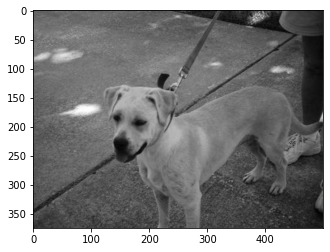

(375, 500)
[[112 112 109 ...  39  38  37]
 [108 110 108 ...  41  40  39]
 [106 108 107 ...  43  42  41]
 ...
 [ 57  60  57 ...  35  33  31]
 [ 46  51  53 ...  34  33  32]
 [ 44  50  52 ...  32  32  33]]


In [ ]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for image_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
  
print(img_array.shape)
print(img_array)

In [ ]:
img_array.shape

(375, 500)

学習データのラベル： 0
学習データのラベル： 1
学習データのラベル： 1
学習データのラベル： 0


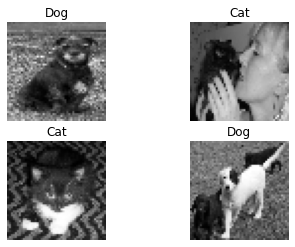

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
DATADIR = "/content/drive/MyDrive/dog and cat"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 50
training_data = []
def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass
create_training_data()
random.shuffle(training_data)  # データをシャッフル
X_train = []  # 画像データ
y_train = []  # ラベル情報
# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)
# numpy配列に変換
X_train = np.array(X_train)
y_train = np.array(y_train)
# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'Dog' if y_train[i] == 0 else 'Cat')
    plt.imshow(X_train[i], cmap='gray')
plt.show()

In [ ]:
X_train.shape

(100, 50, 50)

In [ ]:
y_train.shape

(100,)

データは犬が５０枚、猫が５０枚であり、   犬を０、猫を１とラベルをした。  
サイズは画像を50×50にリサイズしている。  
自作のデータセットが完成したので、これをもとに分類問題を解いてみる。

In [ ]:
X_train = X_train.reshape(-1, 2500)
#X_test = X_test.reshape(-1, 2500)
X_train = X_train.astype(np.float)
#X_test = X_test.astype(np.float)
X_train /= 255
#X_test /= 255

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])

In [ ]:
import tensorflow as tf
input_data = tf.keras.layers.Input(shape=(2500,)) # 入力層

x = tf.keras.layers.Dense(1000, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(1000, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(1000, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=input_data, outputs=output)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot,
                    batch_size=10,
                    epochs=20,
                    verbose=1)

Epoch 1/20
10/10 [==============================] - 1s 35ms/step - loss: 0.6049 - accuracy: 0.6400
Epoch 2/20
10/10 [==============================] - 0s 31ms/step - loss: 0.5414 - accuracy: 0.7000
Epoch 3/20
10/10 [==============================] - 0s 30ms/step - loss: 0.5220 - accuracy: 0.7700
Epoch 4/20
10/10 [==============================] - 0s 33ms/step - loss: 0.4557 - accuracy: 0.8500
Epoch 5/20
10/10 [==============================] - 0s 31ms/step - loss: 0.4207 - accuracy: 0.8000
Epoch 6/20
10/10 [==============================] - 0s 30ms/step - loss: 0.4339 - accuracy: 0.8300
Epoch 7/20
10/10 [==============================] - 0s 33ms/step - loss: 0.3902 - accuracy: 0.8300
Epoch 8/20
10/10 [==============================] - 0s 31ms/step - loss: 0.3739 - accuracy: 0.8600
Epoch 9/20
10/10 [==============================] - 0s 32ms/step - loss: 0.4312 - accuracy: 0.7900
Epoch 10/20
10/10 [==============================] - 0s 32ms/step - loss: 0.3869 - accuracy: 0.8600
Epoch 11/

自作データセットでの分類を行ったが、エポック１０回で正解率９０％まではあげることができた

【問題2】分類データセットに対するデータ拡張

ImageDataGeneratorで行ってみる

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [ ]:
DATADIR = "/content/drive/MyDrive/dog and cat"
CATEGORIES = ["Dog", "Cat"]

In [ ]:
 # １つ画像を表示してみる
im = cv2.imread('/content/drive/MyDrive/dog and cat/Cat/0.jpg')

In [ ]:
im.shape

(375, 500, 3)

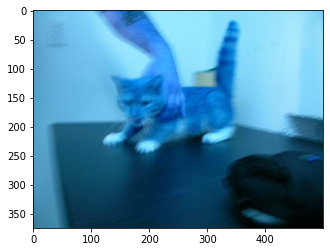

In [ ]:
plt.imshow(im)

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img = image.load_img('/content/drive/MyDrive/dog and cat/Cat/0.jpg')

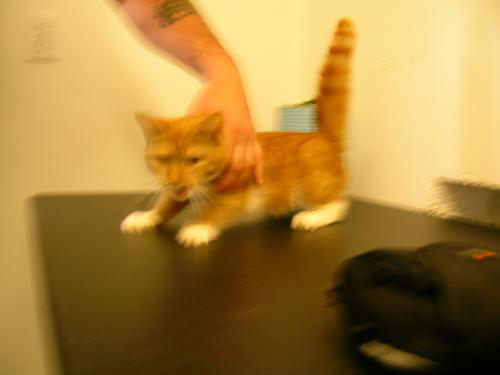

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x = x.reshape((1,) + x.shape)

In [ ]:
x.shape

(1, 375, 500, 3)

In [ ]:
datagen = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

In [ ]:
def show_imgs(imgs, row, col):
    """Show PILimages as row*col
     # Arguments
            imgs: 1-D array, include PILimages
            row: Int, row for plt.subplot
            col: Int, column for plt.subplot
    """
    if len(imgs) != (row * col):
        raise ValueError("Invalid imgs len:{} col:{} row:{}".format(len(imgs), row, col))

    for i, img in enumerate(imgs):
        plot_num = i+1
        plt.subplot(row, col, plot_num)
        plt.tick_params(labelbottom="off") # x軸の削除
        plt.tick_params(labelleft="off") # y軸の削除
        plt.imshow(img)
    plt.show()

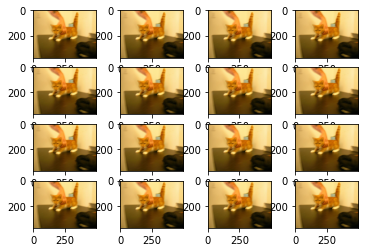

In [ ]:
# 実験用でそのまま出力
max_img_num = 16
imgs = []
for d in datagen.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [ ]:
# 傾けさせる
datagen1 = ImageDataGenerator(
           rotation_range=90,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

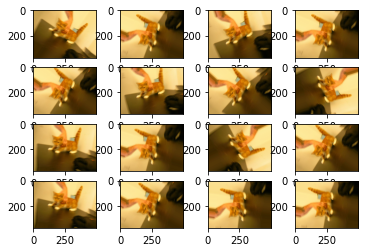

In [ ]:
max_img_num = 16
imgs = []
for d in datagen1.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [ ]:
datagen２ = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=100,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=0.3,
           channel_shift_range=100)

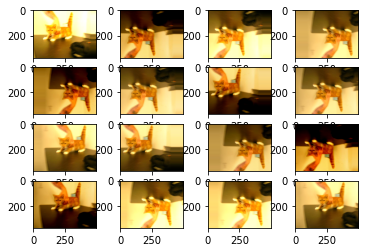

In [ ]:
max_img_num = 16
imgs = []
for d in datagen2.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

ImageDataGeneratorで何パターンか出力をしてデータ拡張を行った

【問題3】物体検出データセットの用意  
ネット上にあった野菜のトマトの画像をもとにデータセットを作成する

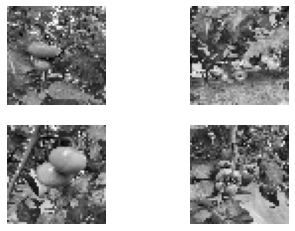

In [23]:
 # 白黒

import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
DATADIR = "/content/drive/MyDrive/tomato"
CATEGORIES = ["tomato1"]
IMG_SIZE = 50
training_data = []
def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass
create_training_data()
random.shuffle(training_data)  # データをシャッフル
X_train = []  # 画像データ
#y_train = []  # ラベル情報
# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    #y_train.append(label)
# numpy配列に変換
X_train = np.array(X_train)


#y_train = np.array(y_train)
# データセットの確認
for i in range(0, 4):
    #print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    #plt.title(label = 'Dog' if y_train[i] == 0 else 'Cat')
    plt.imshow(X_train[i],cmap='gray')
plt.show()

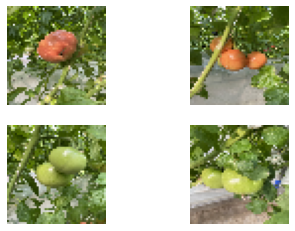

In [21]:
 # カラーのまま

DATADIR = "/content/drive/MyDrive/tomato"
CATEGORIES = ["tomato1"]
IMG_SIZE = 50
training_data = []
def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass
create_training_data()
random.shuffle(training_data)  # データをシャッフル
X_train = []  # 画像データ
#y_train = []  # ラベル情報
# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    #y_train.append(label)
# numpy配列に変換
X_train = np.array(X_train)
#y_train = np.array(y_train)
# データセットの確認
for i in range(0, 4):
    #print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    #plt.title(label = 'Dog' if y_train[i] == 0 else 'Cat')
    img_array = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
plt.show()

【問題4】物体検出データセットに対するデータ拡張  
データ拡張のみを行い、学習に関しては保留する

In [24]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [33]:
 # １つ画像を表示してみる
im = cv2.imread('/content/drive/MyDrive/tomato/tomato1/IMG_0984.jpg')

In [34]:
im.shape

(4032, 3024, 3)

In [41]:
 # img として取り込んでみる
img = image.load_img('/content/drive/MyDrive/tomato/tomato1/IMG_0984.jpg')

In [36]:
img

Output hidden; open in https://colab.research.google.com to view.

In [54]:
# 傾けさせる
datagen1 = ImageDataGenerator(
           rotation_range=90,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

In [55]:
def show_imgs(imgs, row, col):
    """Show PILimages as row*col
     # Arguments
            imgs: 1-D array, include PILimages
            row: Int, row for plt.subplot
            col: Int, column for plt.subplot
    """
    if len(imgs) != (row * col):
        raise ValueError("Invalid imgs len:{} col:{} row:{}".format(len(imgs), row, col))

    for i, img in enumerate(imgs):
        plot_num = i+1
        plt.subplot(row, col, plot_num)
        plt.tick_params(labelbottom="off") # x軸の削除
        plt.tick_params(labelleft="off") # y軸の削除
        plt.imshow(img)
    plt.show()

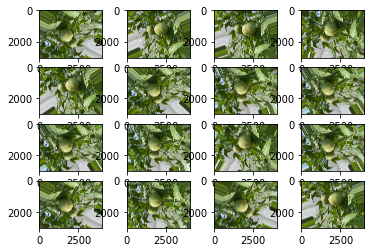

In [57]:
#　４次元配列に修正し出力
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
max_img_num = 16
imgs = []
for d in datagen1.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [58]:
# 傾けさせる
datagen2 = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False,
           channel_shift_range=100)

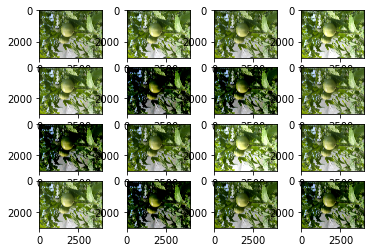

In [59]:
#　４次元配列に修正し出力
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
max_img_num = 16
imgs = []
for d in datagen2.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)